# Employee Review Analysis
## DATA200 Project by Harshita Nagasubramanian and Vishal Srikanth

### Introduction
This project is an exploratory analysis of Walmart Employee reviews and aims to find the general consensus of Walmart's work environment. When analyzing employee reviews, taken into consideration are the employment status of a Walmert employee (former/current), the location of the store (specificity can vary), a numerical rating (1-5), a written review and the date at which the review was posted. 


All the information is sourced from publicly available data. 


### Research Question


### Additional Inference


### Importing the Data

In [1]:
#%pip install nltk matplotlib wordcloud

from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

reviews=pd.read_csv('walmart_cleaned.csv')
reviews.head(30)

,index,title,review,rating,status,position,location,date_posted,year,month,day
0,0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT","El Paso, TX 79904",23/03/2018,2018,3,23
1,1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,"Baton Rouge, LA",11/08/2023,2023,8,11
2,2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,Colorado,11/08/2023,2023,8,11
3,3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,Pennsylvania,11/08/2023,2023,8,11
4,4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,"San Antonio, TX",11/08/2023,2023,8,11
5,5,Easy fun workplace,What is the best part of working at the compan...,5,Current Employee,Customer Service Associate,"Owensboro, KY",11/08/2023,2023,8,11
6,6,It’s sucks that’s that’s all,What is the best part of working at the compan...,1,Former Employee,Cashier/Sales Associate,"Benbrook, TX",11/08/2023,2023,8,11
7,7,it wasn't so bad,"its walmart, its as good as you think it would...",3,Former Employee,Electronics Sales Associate,"Guymon, OK",11/08/2023,2023,8,11
8,8,mid,its very mid if your into mid jobs than this i...,3,Former Employee,Mechanical Engineer,"Texarkana, TX",11/08/2023,2023,8,11
9,9,Awful place to work stressful and unappreciated,What is the best part of working at the compan...,1,Current Employee,Manager,Various,11/08/2023,2023,8,11


The following is a removal of a redundant column (index) and splitting of the Date column into Year, Month and Day columns

In [2]:
reviews=reviews.drop(columns=['index','date_posted'],axis=1)
reviews.head(30)

,title,review,rating,status,position,location,year,month,day
0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT","El Paso, TX 79904",2018,3,23
1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,"Baton Rouge, LA",2023,8,11
2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,Colorado,2023,8,11
3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,Pennsylvania,2023,8,11
4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,"San Antonio, TX",2023,8,11
5,Easy fun workplace,What is the best part of working at the compan...,5,Current Employee,Customer Service Associate,"Owensboro, KY",2023,8,11
6,It’s sucks that’s that’s all,What is the best part of working at the compan...,1,Former Employee,Cashier/Sales Associate,"Benbrook, TX",2023,8,11
7,it wasn't so bad,"its walmart, its as good as you think it would...",3,Former Employee,Electronics Sales Associate,"Guymon, OK",2023,8,11
8,mid,its very mid if your into mid jobs than this i...,3,Former Employee,Mechanical Engineer,"Texarkana, TX",2023,8,11
9,Awful place to work stressful and unappreciated,What is the best part of working at the compan...,1,Current Employee,Manager,Various,2023,8,11


The following function is created to categorize the reviews into Pre-Covid, Covid and Post-Covid eras.

In [3]:
def covid_categories(year):
    if year<2020:
        return 'pre-covid era'
    elif 2020<=year<=2021:
        return 'covid era'
    elif year>2021:
        return 'post-covid era'

reviews['covid category']=reviews['year'].apply(covid_categories)
reviews

,title,review,rating,status,position,location,year,month,day,covid category
0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT","El Paso, TX 79904",2018,3,23,pre-covid era
1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,"Baton Rouge, LA",2023,8,11,post-covid era
2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,Colorado,2023,8,11,post-covid era
3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,Pennsylvania,2023,8,11,post-covid era
4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,"San Antonio, TX",2023,8,11,post-covid era
...,...,...,...,...,...,...,...,...,...,...
221595,"Fast Pace,employes parties,great benifits",A fast and fun place to work at.May be able to...,3,Former Employee,Customer Service,"moore,Ok",2011,4,6,pre-covid era
221596,Productive business,I loved working for walmart because of the fri...,5,Former Employee,SALES ASSOCIATE,DELI DEPARTMENT,2011,4,1,pre-covid era
221597,Good place to work overall.,Walmart is a good place to work though in the ...,4,Former Employee,"Department Manager, Frozen Associate","Humboldt, Tn",2011,3,14,pre-covid era
221598,Not as bad as most think.,I enjoyed working for Wal-Mart for the most pa...,4,Former Employee,Department Manager,"Steubenville, OH",2011,3,8,pre-covid era


In [4]:
# Group by the required columns and count the occurrences
reviews_count = reviews.groupby(['rating', 'status', 'covid category']).size().reset_index(name='count')

# Now you should have a 'count' column with the number of occurrences for each group
reviews_count

,rating,status,covid category,count
0,1,Current Employee,covid era,1768
1,1,Current Employee,post-covid era,1686
2,1,Current Employee,pre-covid era,3580
3,1,Former Employee,covid era,4325
4,1,Former Employee,post-covid era,4166
5,1,Former Employee,pre-covid era,12246
6,2,Current Employee,covid era,1538
7,2,Current Employee,post-covid era,1152
8,2,Current Employee,pre-covid era,4292
9,2,Former Employee,covid era,2937


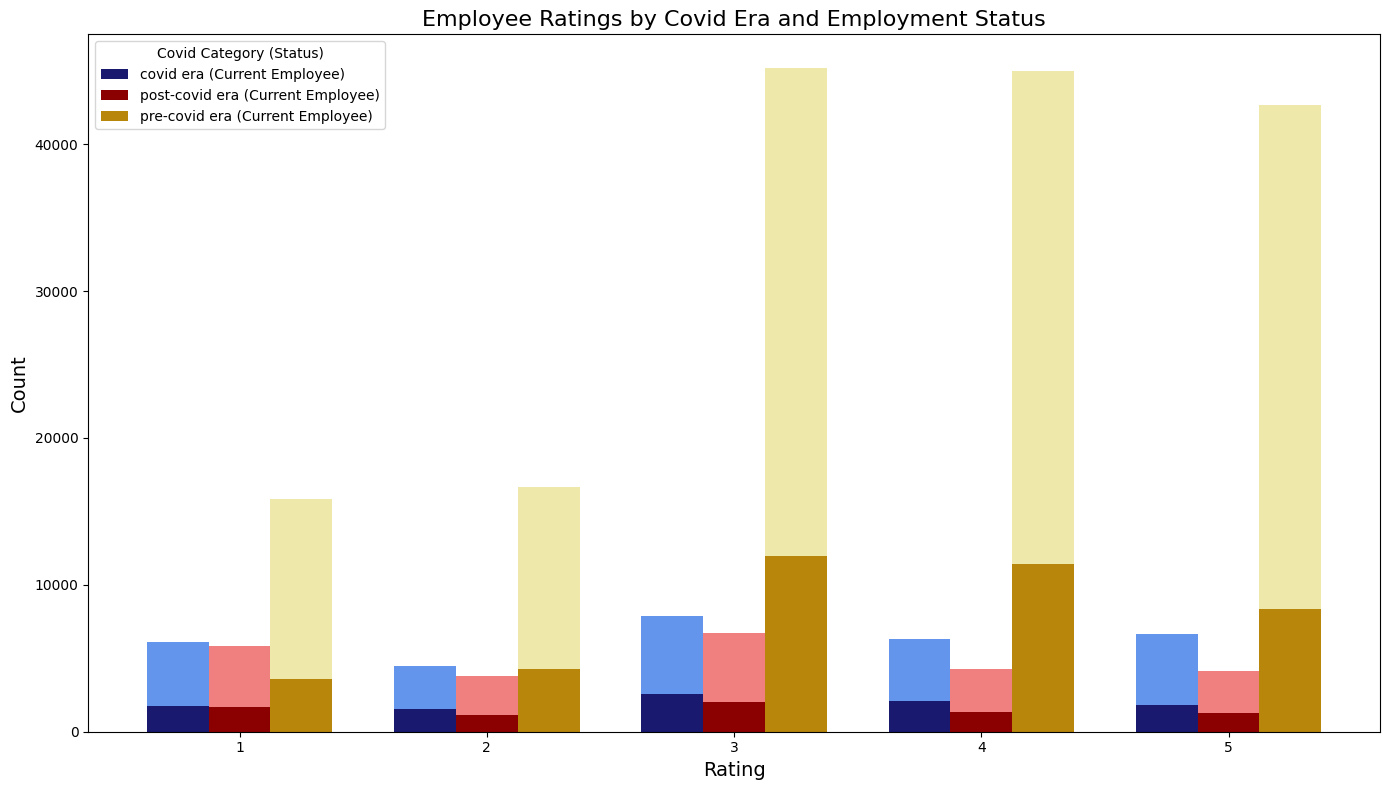

In [5]:
# Define the new colors for each Covid category and status
covid_status_colors = {
    'pre-covid era': {'Current Employee': 'darkgoldenrod', 'Former Employee': 'palegoldenrod'},
    'covid era': {'Current Employee': 'midnightblue', 'Former Employee': 'cornflowerblue'},
    'post-covid era': {'Current Employee': 'darkred', 'Former Employee': 'lightcoral'}
}

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
width = 0.25  # the width of the bars
ind = np.arange(len(reviews_count['rating'].unique()))  # the x locations for the groups

# Group by 'covid_category' this time
for i, (covid_category, sub_df) in enumerate(reviews_count.groupby('covid category')):
    # Stack by 'status'
    bottom = np.zeros(len(reviews['rating'].unique()))  # reset bottom for each covid category
    for status in ['Current Employee', 'Former Employee']:
        values = sub_df[sub_df['status'] == status]['count'].values
        ax.bar(ind + i * width, values, width, bottom=bottom, color=covid_status_colors[covid_category][status], label=f"{covid_category} ({status})" if bottom.sum() == 0 else "")
        bottom += values

# Set the chart title and labels
ax.set_title('Employee Ratings by Covid Era and Employment Status', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the x-ticks and x-tick labels
ax.set_xticks(ind + width)
ax.set_xticklabels(('1', '2', '3', '4', '5'))

# Add a legend
ax.legend(title='Covid Category (Status)')

# Show the plot
plt.tight_layout()
plt.show()

The following is done to make the RegEx analysis easier, all the state names are normalized to only show state abbreviations. In the dataset, some of the locations have state abbreviations and state names, and are inconsistent with their capitalizations. Additionally, reviews with no state specified are removed. 

In [6]:
states = [
    ['Alabama', 'AL'], ['Alaska', 'AK'], ['Arizona', 'AZ'], ['Arkansas', 'AR'], ['California', 'CA'],
    ['Colorado', 'CO'], ['Connecticut', 'CT'], ['Delaware', 'DE'], ['Florida', 'FL'], ['Georgia', 'GA'],
    ['Hawaii', 'HI'], ['Idaho', 'ID'], ['Illinois', 'IL'], ['Indiana', 'IN'], ['Iowa', 'IA'],
    ['Kansas', 'KS'], ['Kentucky', 'KY'], ['Louisiana', 'LA'], ['Maine', 'ME'], ['Maryland', 'MD'],
    ['Massachusetts', 'MA'], ['Michigan', 'MI'], ['Minnesota', 'MN'], ['Mississippi', 'MS'], ['Missouri', 'MO'],
    ['Montana', 'MT'], ['Nebraska', 'NE'], ['Nevada', 'NV'], ['New Hampshire', 'NH'], ['New Jersey', 'NJ'],
    ['New Mexico', 'NM'], ['New York', 'NY'], ['North Carolina', 'NC'], ['North Dakota', 'ND'], ['Ohio', 'OH'],
    ['Oklahoma', 'OK'], ['Oregon', 'OR'], ['Pennsylvania', 'PA'], ['Rhode Island', 'RI'], ['South Carolina', 'SC'],
    ['South Dakota', 'SD'], ['Tennessee', 'TN'], ['Texas', 'TX'], ['Utah', 'UT'], ['Vermont', 'VT'],
    ['Virginia', 'VA'], ['Washington', 'WA'], ['West Virginia', 'WV'], ['Wisconsin', 'WI'], ['Wyoming', 'WY']
]

def state_column(location):
    for state in states:
        if state[0].lower() in location.lower() or state[1].lower() in location.lower():
            return state[1]
    return 'none'

reviews['state']=reviews['location'].apply(state_column)
reviews

,title,review,rating,status,position,location,year,month,day,covid category,state
0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT","El Paso, TX 79904",2018,3,23,pre-covid era,PA
1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,"Baton Rouge, LA",2023,8,11,post-covid era,LA
2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,Colorado,2023,8,11,post-covid era,CO
3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,Pennsylvania,2023,8,11,post-covid era,IA
4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,"San Antonio, TX",2023,8,11,post-covid era,TX
...,...,...,...,...,...,...,...,...,...,...,...
221595,"Fast Pace,employes parties,great benifits",A fast and fun place to work at.May be able to...,3,Former Employee,Customer Service,"moore,Ok",2011,4,6,pre-covid era,MO
221596,Productive business,I loved working for walmart because of the fri...,5,Former Employee,SALES ASSOCIATE,DELI DEPARTMENT,2011,4,1,pre-covid era,AR
221597,Good place to work overall.,Walmart is a good place to work though in the ...,4,Former Employee,"Department Manager, Frozen Associate","Humboldt, Tn",2011,3,14,pre-covid era,TN
221598,Not as bad as most think.,I enjoyed working for Wal-Mart for the most pa...,4,Former Employee,Department Manager,"Steubenville, OH",2011,3,8,pre-covid era,IL


In [7]:
none_states = reviews[reviews['state'] == 'none']
none_states

,title,review,rating,status,position,location,year,month,day,covid category,state
326,Could be better,Management is the worst thing about working he...,1,Former Employee,Fitting Room Associate,United States,2023,8,4,post-covid era,none
420,"Everyone, can do their part and everyone can b...",What is the best part of working at the compan...,5,Former Employee,Cashier/Sales Associate,3425 Rowlett,2023,8,2,post-covid era,none
535,a trash,really just doing this to see reviews somewher...,1,Former Employee,Cashier,Jax,2023,7,31,post-covid era,none
1055,Steady work,Fun fast pass environment with friendly people...,5,Current Employee,Associate,1360 center dr,2023,7,20,post-covid era,none
1334,"Awful, Micromanaging Supervisors",Absolutely horrible place to work. Favoritism ...,1,Former Employee,3rd shift and first shift stocker,Everywhere,2023,7,14,post-covid era,none
...,...,...,...,...,...,...,...,...,...,...,...
221316,Very Productive,This is a great company to work for. The hours...,5,Former Employee,Manager,D.C 7015,2012,1,6,pre-covid era,none
221341,Great place to work !!!,I enjoyed working for this company and would b...,5,Former Employee,Stocker,Los angeles,2011,12,31,pre-covid era,none
221433,a great job for anyone,Unorganized in a lot of areas but a good compa...,4,Current Employee,management,"CLIO, BURTON, K",2011,12,5,pre-covid era,none
221483,"very fun place to be, everyone is nice and car...",i worked a short time and i love every minute ...,4,Former Employee,sales associate,toys,2011,11,18,pre-covid era,none


In [8]:
reviews = reviews[reviews['state'] != 'none']
reviews=reviews.drop(columns=['location'], axis=1)
reviews.reset_index(drop=True, inplace=True)
reviews

,title,review,rating,status,position,year,month,day,covid category,state
0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",2018,3,23,pre-covid era,PA
1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,2023,8,11,post-covid era,LA
2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,2023,8,11,post-covid era,CO
3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,2023,8,11,post-covid era,IA
4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,2023,8,11,post-covid era,TX
...,...,...,...,...,...,...,...,...,...,...
220510,"Fast Pace,employes parties,great benifits",A fast and fun place to work at.May be able to...,3,Former Employee,Customer Service,2011,4,6,pre-covid era,MO
220511,Productive business,I loved working for walmart because of the fri...,5,Former Employee,SALES ASSOCIATE,2011,4,1,pre-covid era,AR
220512,Good place to work overall.,Walmart is a good place to work though in the ...,4,Former Employee,"Department Manager, Frozen Associate",2011,3,14,pre-covid era,TN
220513,Not as bad as most think.,I enjoyed working for Wal-Mart for the most pa...,4,Former Employee,Department Manager,2011,3,8,pre-covid era,IL


Next, we take the average rating per state.

In [9]:
average_rating_by_state = reviews.groupby('state')['rating'].mean().reset_index()

# Rename the columns to match your desired new dataset
average_rating_by_state.columns = ['state', 'average rating']

# Print or display the new dataset
average_rating_by_state

,state,average rating
0,AK,3.379225
1,AL,3.409564
2,AR,3.413496
3,AZ,3.320646
4,CA,3.410402
5,CO,3.312039
6,CT,3.320289
7,DE,3.387142
8,FL,3.440200
9,GA,3.420712


In [10]:
%pip install geopandas
import geopandas as gpd
US = gpd.read_file("gz_2010_us_040_00_5m.json")
US

Note: you may need to restart the kernel to use updated packages.


DriverError: gz_2010_us_040_00_5m.json: No such file or directory

In [ ]:
# Define the list of states to be removed
states_to_remove = ['District of Columbia', 'Puerto Rico', 'Alaska', 'Hawaii']  # Add other states as needed

# Function to remove states from the GeoDataFrame
def remove_states(row):
    if row['NAME'] in states_to_remove:
        return None
    else:
        return row

# Apply the function to filter out specified states
US_filtered = US.apply(remove_states, axis=1).dropna()
US_filtered['STATE ABB']=US_filtered['NAME'].apply(state_column)
US_filtered.reset_index(drop=True, inplace=True)

# Print the filtered GeoDataFrame
US_filtered

In [ ]:
# Merge the shapefile data with the average rating data
merged_data = US_filtered.merge(average_rating_by_state, how='left', left_on='STATE ABB', right_on='state')

# Increase the figure size here
fig, ax = plt.subplots(1, figsize=(20, 15))  # You can increase these numbers

# Plot the choropleth map
merged_data.plot(column='average rating', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Average Rating by State')

for idx, row in US_filtered.iterrows():
    # Get the centroid of the polygon
    centroid = row['geometry'].centroid
    # Add the state name as text at the centroid
    ax.text(centroid.x, centroid.y, row['STATE ABB'], fontsize=8, ha='center', color='black')

# Remove the axis
ax.axis('off')

# Optional: Adjust the aspect ratio
ax.set_aspect('equal')

# Optional: Adjust the limits if the map is not filling the figure
plt.xlim(-130, -65)  # Adjust these values as needed to fit your desired area
plt.ylim(20, 50)     # Adjust these values as needed to fit your desired area

# Optional: Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate average rating for each state and year combination
average_rating_by_state_year = reviews.groupby(['state', 'year'])['rating'].mean().reset_index()

# Plot actual and predicted average rating against year for each state
plt.figure(figsize=(12, 8))

# Input state
state=input('Enter state: ')
# Filter data for the current state
data = average_rating_by_state_year[average_rating_by_state_year['state'] == state]
    
# Prepare the data for linear regression
X = data[['year']]
y = data['rating']
    
# Initialize the linear regression model
model = LinearRegression()
    
# Fit the model
model.fit(X, y)
    
# Make predictions
y_pred = model.predict(X)
    
# Plot actual ratings
plt.scatter(data['year'], data['rating'], label=f'Actual {state} Ratings')
    
# Plot predicted ratings
plt.plot(data['year'], y_pred, label=f'Predicted {state} Ratings', linestyle='--')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Actual vs Predicted Average Rating by State Over Time')
plt.legend()
plt.grid(True)
plt.show()

The inference task for the described bootstrapping analysis involves understanding the variability and uncertainty associated with certain parameters or model predictions based on a given dataset.

In the provided code, we perform two main inference tasks using bootstrapping:

Parameter Estimation: We estimate the mean rating of the dataset using bootstrapping. By repeatedly resampling the dataset with replacement and calculating the mean rating for each resample, we obtain a distribution of mean ratings. From this distribution, we can calculate confidence intervals to understand the range of plausible values for the mean rating. This allows us to infer the uncertainty associated with our estimate of the mean rating.

Model Uncertainty: We assess the uncertainty of a linear regression model's predictions using bootstrapping. By resampling the dataset with replacement, fitting a linear regression model to each resample, and calculating the Mean Squared Error (MSE) for each model, we obtain a distribution of MSE scores. From this distribution, we can calculate confidence intervals to understand the variability in model performance. This allows us to infer the uncertainty associated with the model's predictions.

In summary, the inference task is to quantify and understand the uncertainty and variability associated with certain parameters (mean rating) and model predictions (MSE) based on the given dataset through bootstrapping.

In [11]:
from sklearn.metrics import mean_squared_error

# Function to perform bootstrapping and estimate parameter
def bootstrap_parameter_estimation(data, parameter='rating', n_bootstraps=1000):
    parameters = []
    for _ in range(n_bootstraps):
        # Resample data with replacement
        resample = data.sample(n=len(data), replace=True)
        # Calculate parameter of interest (mean rating in this case)
        parameter_value = resample[parameter].mean()
        parameters.append(parameter_value)
    return parameters

# Perform bootstrapping for parameter estimation
bootstrapped_ratings = bootstrap_parameter_estimation(reviews)

# Calculate confidence interval
confidence_interval = np.percentile(bootstrapped_ratings, [2.5, 97.5])
print("95% Confidence Interval for Mean Rating:", confidence_interval)

# Function to perform bootstrapping for model uncertainty
def bootstrap_model_uncertainty(data, n_bootstraps=100):
    mse_scores = []
    for _ in range(n_bootstraps):
        # Resample data with replacement
        resample = data.sample(n=len(data), replace=True)
        # Fit a linear regression model
        X = resample[['year']]
        y = resample['rating']
        model = LinearRegression()
        model.fit(X, y)
        # Make predictions
        y_pred = model.predict(X)
        # Calculate Mean Squared Error
        mse = mean_squared_error(y, y_pred)
        mse_scores.append(mse)
    return mse_scores

# Perform bootstrapping for model uncertainty
bootstrapped_mse = bootstrap_model_uncertainty(reviews)

# Calculate confidence interval
confidence_interval_mse = np.percentile(bootstrapped_mse, [2.5, 97.5])
print("95% Confidence Interval for Model Uncertainty (MSE):", confidence_interval_mse)


KeyboardInterrupt: 

In [ ]:
# Plot bootstrapped mean ratings
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_ratings, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.title('Bootstrapped Mean Ratings Distribution')
plt.grid(True)
plt.show()

# Plot bootstrapped model uncertainties (MSE)
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_mse, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Model Uncertainty (MSE)')
plt.ylabel('Frequency')
plt.title('Bootstrapped Model Uncertainty (MSE) Distribution')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target variable
X = reviews[['year']]  # Feature
y = reviews['rating']  # Target variable

# Initialize models
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor()

# Hyperparameter tuning using cross-validation
# Linear Regression
linear_regression_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_regression_rmse = np.sqrt(-linear_regression_scores.mean())

# Random Forest
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# Model comparison
print("Linear Regression RMSE:", linear_regression_rmse)
print("Random Forest RMSE:", random_forest_rmse)


In [ ]:
# Define the number of folds for cross-validation
n_folds = 5

# Plotting
plt.figure(figsize=(10, 6))

# Plot RMSE for each fold and model (Linear Regression and Random Forest)
plt.plot(range(1, n_folds + 1), np.sqrt(-linear_regression_scores), marker='o', label='Linear Regression')
plt.plot(range(1, n_folds + 1), np.sqrt(-random_forest_scores), marker='o', label='Random Forest')

# Labels and title
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation Results')
plt.xticks(range(1, n_folds + 1))
plt.legend()
plt.grid(True)
plt.show()